# DAPT Practicum - DSD Partners, Inc.
   
#### Team:  
* Patricia Daniel  
* Elizabeth Marshall  
* Srinath Nayaranan
* Veeral Patel  
  
               
#### Project Objective: 
The goal of this project is to build a predictive model for the current delivery mode that would minimize operator adjustments by 1%.  These adjustments manually modify orders that contain anomalies.  The current algorithm generates orders based on a replenishment model.

## Data Exploration
* Reading, writing, and creating data structures in Python
* Viewing, inspecting, and selecting data

In [1]:
#Import necessary libraries
import pandas as pd #for data processing
import numpy as np #for arrays
import matplotlib.pyplot as plt #plot visualization
import seaborn as sns #plot insightful visualization

from scipy import stats
from scipy.stats import norm, skew #for statistics



In [2]:
#function to remove warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [3]:
#view directory and files
import os
print(os.listdir("."))

['.Rhistory', '.DS_Store', 'DSD_DataExplore.R', 'DSD0100 PD.ipynb', 'Data Profiling Report.ipynb', 'Data Exploration.ipynb', 'DSDPartners_Data_cl.csv', '.ipynb_checkpoints', 'DSDPartners EDA.ipynb']


In [4]:
#read CSV file in pandas and change the datatype containing dates as datetime, 
#index dataframe using the BaseorderID.  NOTE:  using the next cell if you just want to upload
#the csv file as is.  
date_columns = ['Createdate','RecDeliveryDate','Previous2DelDate','MaxScanDate', 'MaxShipDate']
dsd_df = pd.read_csv('/Users/patriciacdaniel/Desktop/Practicum/DSDPartners/src/DSDPartners_Data.csv',
                     index_col = 'BaseorderID', 
                     parse_dates=date_columns)

In [ ]:
# read CSV file in pandas WITHOUT changing the datatype containing dates, index dataframe using BaseOrderId
#NOTE: A cell for MaxShipDate contains a number and must be deleted.  BaseOrderID = 2269573.

#dsd_df = pd.read_csv('{Type file directory}',
#                     index_col = 'BaseorderID', 
#                     parse_dates=date_columns)

In [5]:
#examine the content of the DataFrame
pd.set_option('display.max_columns', None)
dsd_df.head().transpose()

BaseorderID,1867926,1889852,1899415,1921389,1930973
CustStorItemTriadID,13761530,13761530,13761530,13761530,13761530
Createdate,2020-05-01 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-14 00:00:00,2020-05-15 00:00:00
RecDeliveryDate,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00,2020-05-18 00:00:00,2020-05-21 00:00:00
Previous2DelDate,2020-04-30 00:00:00,2020-05-04 00:00:00,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00
MaxScanDate,2020-04-29 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-12 00:00:00,2020-05-13 00:00:00
MaxShipDate,4/27/20,5/4/20,5/4/20,5/11/20,5/11/20
TwoOrderAgo,9.0,18.0,9.0,18.0,9.0
CategoryID,1,1,1,1,1
OaMasterDistributorID,5,5,5,5,5
ConversionFactor,0.75,0.75,0.75,0.75,0.75


In [6]:
dsd_df.shape

(365977, 28)

In [7]:
dsd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365977 entries, 1867926 to 2341090
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CustStorItemTriadID    365977 non-null  int64         
 1   Createdate             365977 non-null  datetime64[ns]
 2   RecDeliveryDate        365977 non-null  datetime64[ns]
 3   Previous2DelDate       365181 non-null  datetime64[ns]
 4   MaxScanDate            348041 non-null  datetime64[ns]
 5   MaxShipDate            350442 non-null  object        
 6   TwoOrderAgo            365976 non-null  float64       
 7   CategoryID             365977 non-null  int64         
 8   OaMasterDistributorID  365977 non-null  int64         
 9   ConversionFactor       365977 non-null  float64       
 10  InventoryChange        365977 non-null  int64         
 11  ActualScans            365977 non-null  int64         
 12  ForecastedScans        365977 non-nul

#### method 1
`cols_selected = ['Createdate','RecDeliveryDate','Previous2DelDate',
'MaxScanDate']
#dsd_df['MaxShipDate'] = dsd_df['MaxShipDate'].apply(pd.to_datetime, format='%m/%d/%y')
#dsd_df[cols_selected].head()`

#### method 2
`import pandas as pd
#cols_2_extract = data.columns[2:15]
#data[cols_2_extract] = data[cols_2_extract].applymap(lambda x : pd.to_datetime(x, format = '%d %M %Y'))`

In [8]:
#Remove the column with incorrect data regarding `MaxShipDate` and convert to datetime.
dsd_df.drop([2269573], inplace = True)
dsd_df['MaxShipDate'] = dsd_df['MaxShipDate'].apply(pd.to_datetime, format='%m/%d/%y')
#dsd_df[cols_selected].head()

#method 2
#import pandas as pd
#cols_2_extract = data.columns[2:15]
#data[cols_2_extract] = data[cols_2_extract].applymap(lambda x : pd.to_datetime(x, format = '%d %M %Y'))

In [9]:
#Change the variable lowercase
def lower_case_cols(data_frames):
    #change all column names to lowercase and replace spaces with underscore
    data_frames = data_frames.columns.str.lower().str.replace(' ', '_')
    return data_frames

dsd_df.columns = lower_case_cols(dsd_df)

In [10]:
#reorder columns to group datetime variables and scans
dsd_df = dsd_df[['createdate', 'recdeliverydate','maxscandate', 'maxshipdate','previous2deldate',
                 'baseorder','inventorychange', 'actualscans', 'forecastedscans', 'qtyshippedtwoorderago',
                 'twoorderago','originalproporderqty', 'proporderqty','maxdeliveredqty', 'trueupadjqty',
                 'weightdata', 'conversionfactor','conversionunits','conversionresidual','tuaissue','categoryid', 
                 'oamasterdistributorid','modelused','slowmoving','toobig','reviewed', 'incinanom']]
#remove unnecessary variables
dsd_df = dsd_df.copy().drop(['conversionfactor'], axis=1)
dsd_df.head().T

BaseorderID,1867926,1889852,1899415,1921389,1930973
createdate,2020-05-01 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-14 00:00:00,2020-05-15 00:00:00
recdeliverydate,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00,2020-05-18 00:00:00,2020-05-21 00:00:00
maxscandate,2020-04-29 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-12 00:00:00,2020-05-13 00:00:00
maxshipdate,2020-04-27 00:00:00,2020-05-04 00:00:00,2020-05-04 00:00:00,2020-05-11 00:00:00,2020-05-11 00:00:00
previous2deldate,2020-04-30 00:00:00,2020-05-04 00:00:00,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00
baseorder,8,26,10,15,14
inventorychange,12,3,5,5,12
actualscans,0,0,0,0,0
forecastedscans,13,18,11,17,10
qtyshippedtwoorderago,0.0,13.0,0.0,12.0,0.0


### Data Types

In [11]:
#View the data types
dsd_df.dtypes

createdate               datetime64[ns]
recdeliverydate          datetime64[ns]
maxscandate              datetime64[ns]
maxshipdate              datetime64[ns]
previous2deldate         datetime64[ns]
baseorder                         int64
inventorychange                   int64
actualscans                       int64
forecastedscans                   int64
qtyshippedtwoorderago           float64
twoorderago                     float64
originalproporderqty              int64
proporderqty                      int64
maxdeliveredqty                   int64
trueupadjqty                      int64
weightdata                        int64
conversionunits                   int64
conversionresidual                int64
tuaissue                          int64
categoryid                        int64
oamasterdistributorid             int64
modelused                        object
slowmoving                        int64
toobig                            int64
reviewed                        float64


In [12]:
#convert categorical variables to str
dsd_df['categoryid']= dsd_df['categoryid'].astype(str)
dsd_df['oamasterdistributorid'] = dsd_df['oamasterdistributorid'].astype(str)
dsd_df['slowmoving'] = dsd_df['slowmoving'].astype(str)
dsd_df['toobig'] = dsd_df['toobig'].astype(str)
dsd_df['tuaissue'] = dsd_df['tuaissue'].astype(str)
dsd_df['reviewed'] = dsd_df['reviewed'].astype(str)
dsd_df['incinanom'] = dsd_df['incinanom'].astype(str)

In [13]:
#Percentage of missing values
missing_data = pd.DataFrame({'total_missing': dsd_df.isnull().sum(), 'perc_missing': (dsd_df.isnull().sum()/365976)*100})
missing_data

,total_missing,perc_missing
createdate,0,0.000000
recdeliverydate,0,0.000000
maxscandate,17936,4.900868
maxshipdate,15535,4.244814
previous2deldate,796,0.217501
baseorder,0,0.000000
inventorychange,0,0.000000
actualscans,0,0.000000
forecastedscans,0,0.000000
qtyshippedtwoorderago,0,0.000000


### Missing Records

In [14]:
# Removing records with missing maxscandate and maxshippeddate.
# dropping the rows having NaN values 
dsd_df = dsd_df.dropna() 
  
# To reset the indices  
dsd_df = dsd_df.reset_index(drop = True) 
  
# Print the dataframe 
dsd_df 

,createdate,recdeliverydate,maxscandate,maxshipdate,previous2deldate,baseorder,inventorychange,actualscans,forecastedscans,qtyshippedtwoorderago,twoorderago,originalproporderqty,proporderqty,maxdeliveredqty,trueupadjqty,weightdata,conversionunits,conversionresidual,tuaissue,categoryid,oamasterdistributorid,modelused,slowmoving,toobig,reviewed,incinanom
0,2020-05-01,2020-05-07,2020-04-29,2020-04-27,2020-04-30,8,12,0,13,0.0,9.0,9,9,27,0,1,9,1,0,1,5,MovingAverage,0,0,1.0,1.0
1,2020-05-07,2020-05-11,2020-05-05,2020-05-04,2020-05-04,26,3,0,18,13.0,18.0,18,18,27,-9,1,9,6,0,1,5,MovingAverage,0,0,1.0,1.0
2,2020-05-08,2020-05-14,2020-05-06,2020-05-04,2020-05-07,10,5,0,11,0.0,9.0,9,9,27,-2,1,9,0,0,1,5,MovingAverage,0,0,1.0,1.0
3,2020-05-14,2020-05-18,2020-05-12,2020-05-11,2020-05-11,15,5,0,17,12.0,18.0,9,18,27,-7,1,9,1,0,1,5,MovingAverage,0,0,1.0,1.0
4,2020-05-15,2020-05-21,2020-05-13,2020-05-11,2020-05-14,14,12,0,10,0.0,9.0,18,9,27,3,1,9,3,0,1,5,MovingAverage,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346171,2020-07-02,2020-07-06,2020-06-29,2020-06-29,2020-06-29,5,1,0,4,4.0,4.0,4,4,8,-1,0,4,1,0,1,5,R,0,0,0.0,1.0
346172,2020-07-17,2020-07-20,2020-07-14,2020-07-09,2020-07-13,5,3,0,3,0.0,0.0,8,4,8,3,0,4,2,0,1,5,R,0,0,0.0,1.0
346173,2020-06-26,2020-06-29,2020-06-19,2020-06-22,2020-06-22,2,0,0,0,4.0,4.0,4,4,8,-2,4,4,2,0,1,5,R,0,0,1.0,1.0
346174,2020-06-30,2020-07-02,2020-06-28,2020-06-22,2020-06-25,2,2,0,3,0.0,0.0,4,4,8,2,0,4,0,0,1,5,R,0,0,0.0,1.0


In [15]:
#Percentage of missing values
missing_data = pd.DataFrame({'total_missing': dsd_df.isnull().sum(), 'perc_missing': (dsd_df.isnull().sum()/365976)*100})
missing_data

,total_missing,perc_missing
createdate,0,0.0
recdeliverydate,0,0.0
maxscandate,0,0.0
maxshipdate,0,0.0
previous2deldate,0,0.0
baseorder,0,0.0
inventorychange,0,0.0
actualscans,0,0.0
forecastedscans,0,0.0
qtyshippedtwoorderago,0,0.0


In [17]:
dsd_df.to_csv('/Users/patriciacdaniel/Desktop/Practicum/DSDPartners/data_clean/DSDPartners_Data_cl.csv')

### Numerical data distribution
Look at the distribution of all the numeric features and plotting them.

In [18]:
list(set(dsd_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('<M8[ns]')]

In [62]:
dsd_df_num = dsd_df.select_dtypes(include = ['float64','int64'])
dsd_df_num.head()

,baseorder,inventorychange,actualscans,forecastedscans,qtyshippedtwoorderago,twoorderago,originalproporderqty,proporderqty,maxdeliveredqty,trueupadjqty,weightdata,conversionunits,conversionresidual
0,8,12,0,13,0.0,9.0,9,9,27,0,1,9,1
1,26,3,0,18,13.0,18.0,18,18,27,-9,1,9,6
2,10,5,0,11,0.0,9.0,9,9,27,-2,1,9,0
3,15,5,0,17,12.0,18.0,9,18,27,-7,1,9,1
4,14,12,0,10,0.0,9.0,18,9,27,3,1,9,3


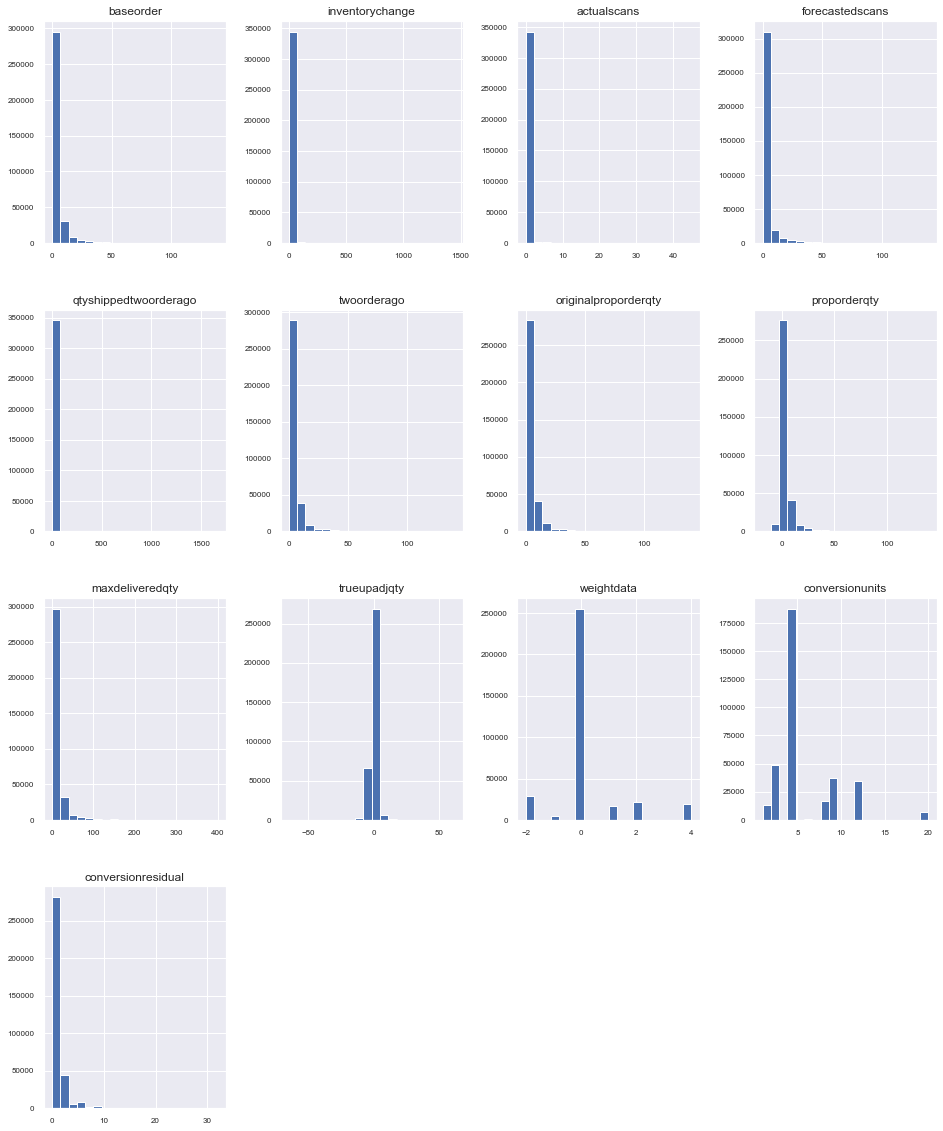

In [65]:
dsd_df_num.hist(figsize=(16,20), bins=20, xlabelsize = 8, ylabelsize=8);

`for column in dsd_df.columns.values.tolist():
    print(column)
    print(dsd_df[column].value_counts(sort=True, dropna=True))
    print("")`

returns the number of unique  values for each variable

`dsd_df.nunique(axis=0, dropna=True).sort_values(ascending = False)`

In [20]:
#summarize the count, mean , stand. dev, min and max for numeric values
pd.set_option("precision", 2)
dsd_df.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))).T

,count,mean,std,min,25%,50%,75%,max
baseorder,346176.000000,3.224493,7.094756,0.000000,0.000000,0.000000,4.000000,139.000000
inventorychange,346176.000000,6.637060,21.113965,0.000000,1.000000,4.000000,7.000000,1447.000000
actualscans,346176.000000,0.098698,0.908976,0.000000,0.000000,0.000000,0.000000,45.000000
forecastedscans,346176.000000,3.018950,6.670483,0.000000,0.000000,0.000000,4.000000,139.000000
qtyshippedtwoorderago,346176.000000,2.279618,7.657962,0.000000,0.000000,0.000000,0.000000,1668.000000
twoorderago,346176.000000,3.192757,7.192419,0.000000,0.000000,0.000000,4.000000,140.000000
originalproporderqty,346176.000000,3.394516,7.664893,0.000000,0.000000,0.000000,4.000000,140.000000
proporderqty,346176.000000,2.841329,7.352758,-19.000000,0.000000,0.000000,4.000000,140.000000
maxdeliveredqty,346176.000000,13.460150,18.538734,1.000000,4.000000,8.000000,12.000000,400.000000
trueupadjqty,346176.000000,-0.359716,2.426146,-65.000000,-1.000000,0.000000,0.000000,62.000000


In [21]:
corr = dsd_df.corr()
corr

,baseorder,inventorychange,actualscans,forecastedscans,qtyshippedtwoorderago,twoorderago,originalproporderqty,proporderqty,maxdeliveredqty,trueupadjqty,weightdata,conversionunits,conversionresidual
baseorder,1.00,0.31,2.87e-01,0.97,0.65,0.87,0.95,0.94,0.71,-0.06,0.39,-2.70e-02,0.41
inventorychange,0.31,1.00,5.94e-02,0.32,0.10,0.30,0.30,0.31,0.34,0.01,0.11,4.95e-02,0.07
actualscans,0.29,0.06,1.00e+00,0.17,0.25,0.25,0.27,0.27,0.17,-0.01,0.10,-7.47e-03,0.06
forecastedscans,0.97,0.32,1.68e-01,1.00,0.65,0.89,0.92,0.93,0.73,-0.07,0.40,-3.81e-02,0.28
qtyshippedtwoorderago,0.65,0.10,2.54e-01,0.65,1.00,0.63,0.63,0.63,0.50,-0.03,0.32,-1.68e-02,0.16
twoorderago,0.87,0.30,2.55e-01,0.89,0.63,1.00,0.83,0.84,0.70,-0.12,0.42,-2.87e-02,0.21
originalproporderqty,0.95,0.30,2.73e-01,0.92,0.63,0.83,1.00,0.95,0.68,0.19,0.48,-2.30e-02,0.43
proporderqty,0.94,0.31,2.67e-01,0.93,0.63,0.84,0.95,1.00,0.69,0.13,0.45,-1.95e-02,0.37
maxdeliveredqty,0.71,0.34,1.70e-01,0.73,0.50,0.70,0.68,0.69,1.00,-0.08,0.34,8.07e-02,0.20
trueupadjqty,-0.06,0.01,-1.26e-02,-0.07,-0.03,-0.12,0.19,0.13,-0.08,1.00,-0.02,3.09e-02,0.10


<AxesSubplot:>

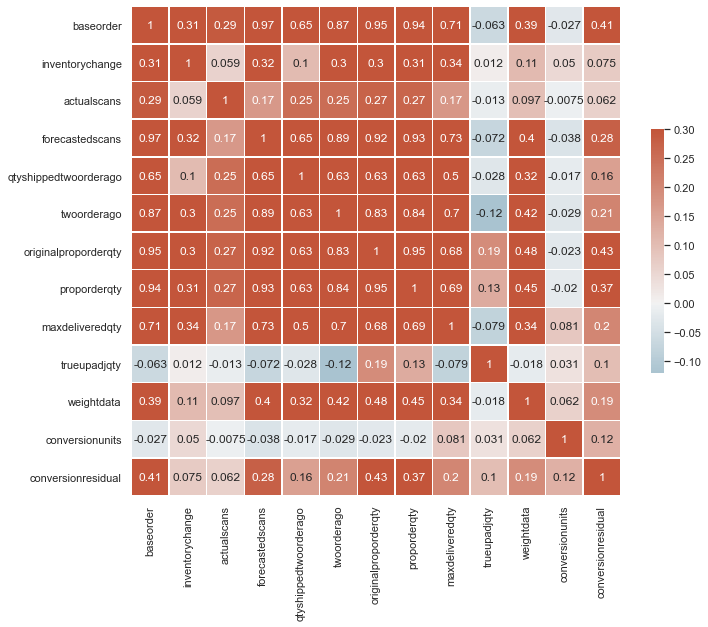

In [51]:
corr = dsd_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

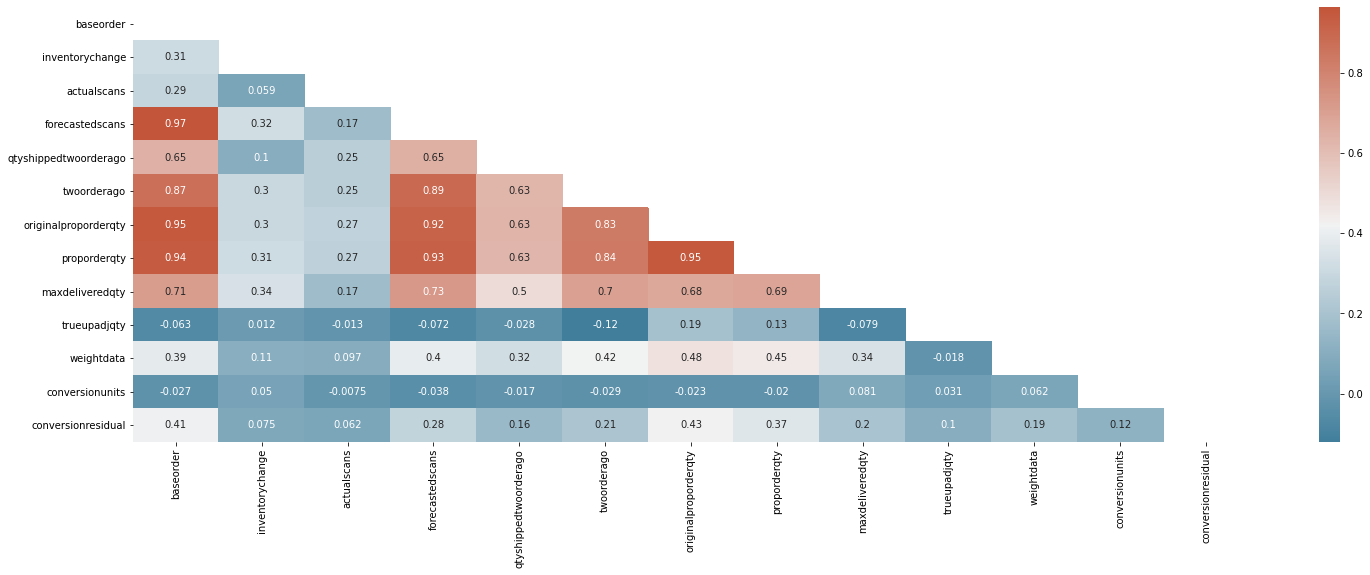

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 8))
#plot the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True)

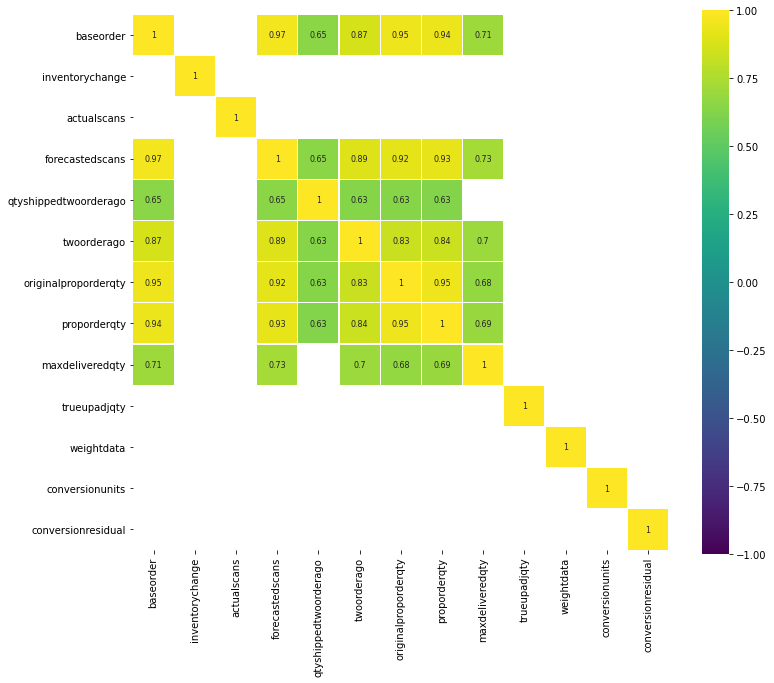

In [24]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

The above heatmaps shows several features that are highly positively correlation.

In [25]:
dsd_df_num_corr = dsd_df_num.corr()['originalproporderqty'][:-1]
golden_features_list = dsd_df_num_corr[abs(dsd_df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with originalproporderqty:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with originalproporderqty:
originalproporderqty     1.00
proporderqty             0.95
baseorder                0.95
forecastedscans          0.92
twoorderago              0.83
maxdeliveredqty          0.68
qtyshippedtwoorderago    0.63
Name: originalproporderqty, dtype: float64


In [26]:
dsd_df_num_corr = dsd_df_num.corr()['proporderqty'][:-1]
golden_features_list = dsd_df_num_corr[abs(dsd_df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with proporderqty:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with proporderqty:
proporderqty             1.00
originalproporderqty     0.95
baseorder                0.94
forecastedscans          0.93
twoorderago              0.84
maxdeliveredqty          0.69
qtyshippedtwoorderago    0.63
Name: proporderqty, dtype: float64


In [52]:
dsd_df_num.columns

Index(['baseorder', 'inventorychange', 'actualscans', 'forecastedscans',
       'qtyshippedtwoorderago', 'twoorderago', 'originalproporderqty',
       'proporderqty', 'maxdeliveredqty', 'trueupadjqty', 'weightdata',
       'conversionunits', 'conversionresidual'],
      dtype='object')

In [73]:
#rename highyl correlated features as new data
dsdnum = dsd_df_num.copy().drop([ 'baseorder','inventorychange', 'actualscans', 'weightdata',
       'conversionunits', 'trueupadjqty','conversionresidual'], axis=1)

In [69]:
dsdnum.head()

,forecastedscans,qtyshippedtwoorderago,twoorderago,originalproporderqty,proporderqty,maxdeliveredqty,conversionresidual
0,13,0.0,9.0,9,9,27,1
1,18,13.0,18.0,18,18,27,6
2,11,0.0,9.0,9,9,27,0
3,17,12.0,18.0,9,18,27,1
4,10,0.0,9.0,18,9,27,3


In [75]:
#Take the log of each numeric 
dsdnum['log_forecasted'] = np.log10(dsdnum['forecastedscans'])
dsdnum['log_qtyshipped'] = np.log10(dsdnum['qtyshippedtwoorderago'])
dsdnum['log_twoorderago'] = np.log10(dsdnum['twoorderago'])
dsdnum['log_originalproporderqty']= np.log10(dsdnum['originalproporderqty'])
dsdnum['log_proporderqty']= np.log10(dsdnum['proporderqty'])
dsdnum['log_originalproporderqty']= np.log10(dsdnum['originalproporderqty'])
dsdnum['log_maxdeliveredqty']= np.log10(dsdnum['maxdeliveredqty'])

#drop the non-log
dsdnumlog = dsdnum.drop(columns = ['forecastedscans',
       'qtyshippedtwoorderago', 'twoorderago', 'originalproporderqty',
       'proporderqty', 'maxdeliveredqty'])

dsdnumlog



,log_forecasted,log_qtyshipped,log_twoorderago,log_originalproporderqty,log_proporderqty,log_maxdeliveredqty
0,1.113943,-inf,0.954243,0.954243,0.954243,1.431364
1,1.255273,1.113943,1.255273,1.255273,1.255273,1.431364
2,1.041393,-inf,0.954243,0.954243,0.954243,1.431364
3,1.230449,1.079181,1.255273,0.954243,1.255273,1.431364
4,1.000000,-inf,0.954243,1.255273,0.954243,1.431364
...,...,...,...,...,...,...
346171,0.602060,0.602060,0.602060,0.602060,0.602060,0.903090
346172,0.477121,-inf,-inf,0.903090,0.602060,0.903090
346173,-inf,0.602060,0.602060,0.602060,0.602060,0.903090
346174,0.477121,-inf,-inf,0.602060,0.602060,0.903090


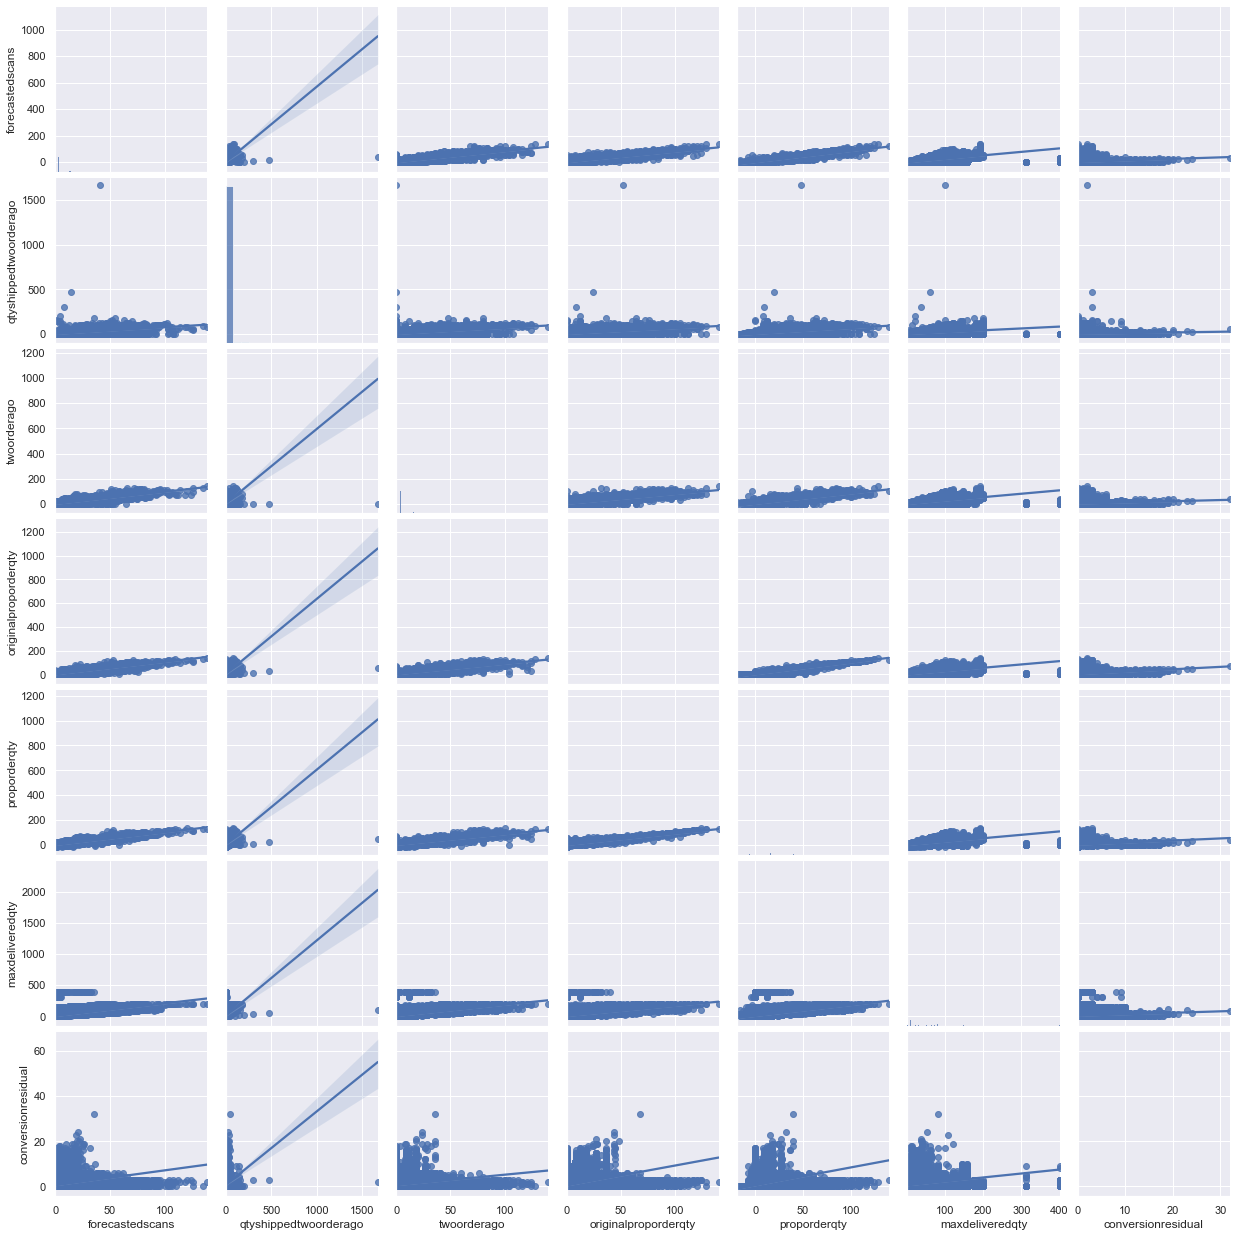

In [70]:
sns.set_theme()

# with regression
sns.pairplot(dsdnum, kind="reg")
plt.show()

### Categorical data distribution

In [28]:
#Select the quantitative features
quantitative_features_list = [
       'inventorychange', 'actualscans', 'forecastedscans',
       'weightdata', 'baseorder', 'trueupadjqty','originalproporderqty', 
       'proporderqty', 'conversionunits','maxdeliveredqty', 
       'conversionresidual','twoorderago', 'qtyshippedtwoorderago']
df_quantitative_values = dsd_df[quantitative_features_list]
df_quantitative_values.head().T

,0,1,2,3,4
inventorychange,12.0,3.0,5.0,5.0,12.0
actualscans,0.0,0.0,0.0,0.0,0.0
forecastedscans,13.0,18.0,11.0,17.0,10.0
weightdata,1.0,1.0,1.0,1.0,1.0
baseorder,8.0,26.0,10.0,15.0,14.0
trueupadjqty,0.0,-9.0,-2.0,-7.0,3.0
originalproporderqty,9.0,18.0,9.0,9.0,18.0
proporderqty,9.0,18.0,9.0,18.0,9.0
conversionunits,9.0,9.0,9.0,9.0,9.0
maxdeliveredqty,27.0,27.0,27.0,27.0,27.0


In [30]:
categorical_features = [a for a in quantitative_features_list[:-1] + dsd_df.columns.tolist() 
                        if (a not in quantitative_features_list[:-1]) or (a not in dsd_df.columns.tolist())]
df_categ = dsd_df[categorical_features]
df_categ.head()

,createdate,recdeliverydate,maxscandate,maxshipdate,previous2deldate,qtyshippedtwoorderago,tuaissue,categoryid,oamasterdistributorid,modelused,slowmoving,toobig,reviewed,incinanom
0,2020-05-01,2020-05-07,2020-04-29,2020-04-27,2020-04-30,0.0,0,1,5,MovingAverage,0,0,1.0,1.0
1,2020-05-07,2020-05-11,2020-05-05,2020-05-04,2020-05-04,13.0,0,1,5,MovingAverage,0,0,1.0,1.0
2,2020-05-08,2020-05-14,2020-05-06,2020-05-04,2020-05-07,0.0,0,1,5,MovingAverage,0,0,1.0,1.0
3,2020-05-14,2020-05-18,2020-05-12,2020-05-11,2020-05-11,12.0,0,1,5,MovingAverage,0,0,1.0,1.0
4,2020-05-15,2020-05-21,2020-05-13,2020-05-11,2020-05-14,0.0,0,1,5,MovingAverage,0,0,1.0,1.0


In [31]:
ds_cat = dsd_df.select_dtypes(include = 'object').copy()
ds_cat.head()

,tuaissue,categoryid,oamasterdistributorid,modelused,slowmoving,toobig,reviewed,incinanom
0,0,1,5,MovingAverage,0,0,1.0,1.0
1,0,1,5,MovingAverage,0,0,1.0,1.0
2,0,1,5,MovingAverage,0,0,1.0,1.0
3,0,1,5,MovingAverage,0,0,1.0,1.0
4,0,1,5,MovingAverage,0,0,1.0,1.0


In [32]:
#returns the number of unique  values for each variable
ds_cat.nunique(axis=0, dropna=True).sort_values(ascending=False)

categoryid               3
tuaissue                 2
oamasterdistributorid    2
modelused                2
slowmoving               2
toobig                   2
reviewed                 2
incinanom                2
dtype: int64

<AxesSubplot:xlabel='incinanom', ylabel='count'>

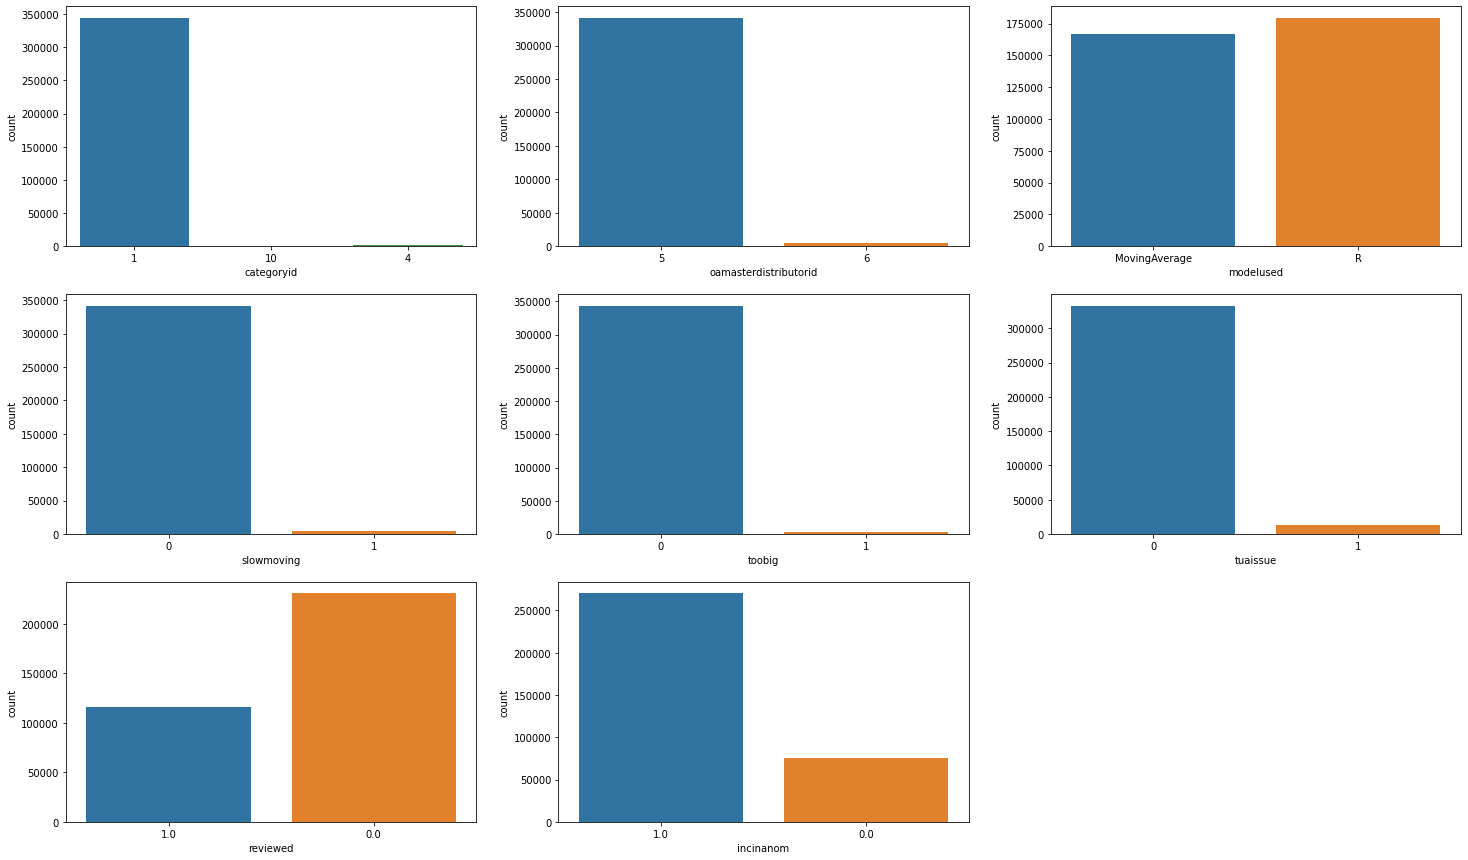

In [33]:
fig = plt.figure(figsize = (25,15))

ax1 = fig.add_subplot(3,3,1)
sns.countplot(data = ds_cat, x = 'categoryid', ax=ax1)

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data = ds_cat, x = 'oamasterdistributorid', ax=ax2)

ax3 = fig.add_subplot(3,3,3)
sns.countplot(data = ds_cat, x = 'modelused', ax=ax3)

ax4 = fig.add_subplot(3,3,4)
sns.countplot(data = ds_cat, x = 'slowmoving', ax=ax4)

ax5 = fig.add_subplot(3,3,5)
sns.countplot(data = ds_cat, x = 'toobig', ax=ax5)

ax6 = fig.add_subplot(3,3,6)
sns.countplot(data = ds_cat, x = 'tuaissue', ax=ax6)

ax7 = fig.add_subplot(3,3,7)
sns.countplot(data = ds_cat, x = 'reviewed', ax=ax7)

ax8 = fig.add_subplot(3,3,8)
sns.countplot(data = ds_cat, x = 'incinanom', ax=ax8)


In [34]:
dsd_df.to_csv('/Users/patriciacdaniel/Desktop/Practicum/DSDPartners/data clean/DSDPartners_Data_cl.csv')

#remove variables with 40% null values
NA_val = dsd_df_cleaned.isna().sum()

def na_filter(na,threshold = .05): 
    col_pass = []
    for i in na.keys():
        if na[i]/dsd_df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass

dsd_df_cleaned = dsd_df_cleaned[na_filter(NA_val)]
dsd_df_cleaned.columns

In [35]:
dsd_df.head().T

,0,1,2,3,4
createdate,2020-05-01 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-14 00:00:00,2020-05-15 00:00:00
recdeliverydate,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00,2020-05-18 00:00:00,2020-05-21 00:00:00
maxscandate,2020-04-29 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-12 00:00:00,2020-05-13 00:00:00
maxshipdate,2020-04-27 00:00:00,2020-05-04 00:00:00,2020-05-04 00:00:00,2020-05-11 00:00:00,2020-05-11 00:00:00
previous2deldate,2020-04-30 00:00:00,2020-05-04 00:00:00,2020-05-07 00:00:00,2020-05-11 00:00:00,2020-05-14 00:00:00
baseorder,8,26,10,15,14
inventorychange,12,3,5,5,12
actualscans,0,0,0,0,0
forecastedscans,13,18,11,17,10
qtyshippedtwoorderago,0.0,13.0,0.0,12.0,0.0


In [36]:
dsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346176 entries, 0 to 346175
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   createdate             346176 non-null  datetime64[ns]
 1   recdeliverydate        346176 non-null  datetime64[ns]
 2   maxscandate            346176 non-null  datetime64[ns]
 3   maxshipdate            346176 non-null  datetime64[ns]
 4   previous2deldate       346176 non-null  datetime64[ns]
 5   baseorder              346176 non-null  int64         
 6   inventorychange        346176 non-null  int64         
 7   actualscans            346176 non-null  int64         
 8   forecastedscans        346176 non-null  int64         
 9   qtyshippedtwoorderago  346176 non-null  float64       
 10  twoorderago            346176 non-null  float64       
 11  originalproporderqty   346176 non-null  int64         
 12  proporderqty           346176 non-null  int6

In [37]:
dsd_df_num.columns

Index(['baseorder', 'inventorychange', 'actualscans', 'forecastedscans',
       'qtyshippedtwoorderago', 'twoorderago', 'originalproporderqty',
       'proporderqty', 'maxdeliveredqty', 'trueupadjqty', 'weightdata',
       'conversionunits', 'conversionresidual'],
      dtype='object')

# sklearn

In [79]:
#Import library
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(dsd_df_num)
#Convert to table format - StandardScaler - Rescale the variables
sc_X = pd.DataFrame(data=sc_X, columns=['baseorder', 'inventorychange', 'actualscans',
       'forecastedscans', 'qtyshippedtwoorderago', 'twoorderago',
       'originalproporderqty', 'proporderqty', 'maxdeliveredqty',
       'trueupadjqty', 'weightdata', 'conversionunits', 'conversionresidual'])
sc_X

,baseorder,inventorychange,actualscans,forecastedscans,qtyshippedtwoorderago,twoorderago,originalproporderqty,proporderqty,maxdeliveredqty,trueupadjqty,weightdata,conversionunits,conversionresidual
0,0.673105,0.254000,-0.108582,1.496303,-0.297680,0.807413,0.731320,0.837601,0.730356,0.148267,0.638844,0.959301,0.162558
1,3.210194,-0.172259,-0.108582,2.245875,1.399902,2.058732,1.905507,2.061633,0.730356,-3.561326,0.638844,0.959301,3.293399
2,0.955004,-0.077535,-0.108582,1.196474,-0.297680,0.807413,0.731320,0.837601,0.730356,-0.676087,0.638844,0.959301,-0.463610
3,1.659750,-0.077535,-0.108582,2.095961,1.269319,2.058732,0.731320,2.061633,0.730356,-2.736972,0.638844,0.959301,0.162558
4,1.518801,0.254000,-0.108582,1.046560,-0.297680,0.807413,1.905507,0.837601,0.730356,1.384798,0.638844,0.959301,1.414894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346171,0.250257,-0.266983,-0.108582,0.147074,0.224653,0.112235,0.078995,0.157583,-0.294527,-0.263910,-0.178538,-0.396901,0.162558
346172,0.250257,-0.172259,-0.108582,-0.002841,-0.297680,-0.443907,0.600855,0.157583,-0.294527,1.384798,-0.178538,-0.396901,0.788726
346173,-0.172591,-0.314345,-0.108582,-0.452584,0.224653,0.112235,0.078995,0.157583,-0.294527,-0.676087,3.090989,-0.396901,0.788726
346174,-0.172591,-0.219621,-0.108582,-0.002841,-0.297680,-0.443907,0.078995,0.157583,-0.294527,0.972621,-0.178538,-0.396901,-0.463610


In [80]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [82]:
# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
    df = np.array(df)
    model = msm.estimate_markov_model(df, 1)
    return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [89]:
# Take useful feature and standardize them
data = dsd_df_num[['forecastedscans',
       'qtyshippedtwoorderago', 'twoorderago', 'originalproporderqty',
       'proporderqty', 'maxdeliveredqty']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)



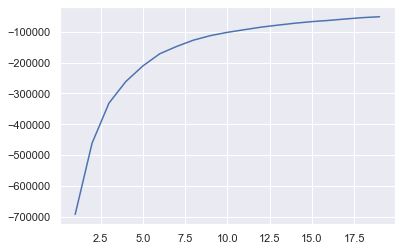

In [90]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dsd_df_num)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [85]:
finalDf = pd.concat([principalDf, dsd_df_num[['proporderqty']]], axis = 1)

In [87]:
finalDf

,principal component 1,principal component 2,proporderqty
0,18.104532,-6.848082,9
1,25.415868,-24.875530,18
2,13.805764,-12.370705,9
3,21.817421,-19.436850,18
4,20.831232,-8.982652,9
...,...,...,...
346171,-5.380224,-3.161882,4
346172,-4.891468,-0.718485,4
346173,-7.379191,-2.899881,4
346174,-7.081236,-0.272668,4
